Load the Dataset

In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/mnt/data/usgs_main.csv")

# See basic shape and columns
print("Original shape:", df.shape)
df.head()


Original shape: (75810, 22)


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-03-04T21:28:02.440Z,38.759666,-122.719666,1.61,1.24,md,14.0,115.0,0.004494,0.04,...,2022-03-04T21:29:36.906Z,"3km SW of Anderson Springs, CA",earthquake,0.30,0.36,0.100,5.0,automatic,nc,nc
1,2022-03-04T21:27:28.190Z,38.833832,-122.815498,1.82,1.13,md,22.0,66.0,0.016320,0.02,...,2022-03-04T21:29:02.128Z,"8km NW of The Geysers, CA",earthquake,0.19,0.53,0.140,4.0,automatic,nc,nc
2,2022-03-04T21:25:05.130Z,35.596668,-120.271332,11.57,2.31,md,5.0,178.0,0.159000,0.01,...,2022-03-04T21:26:56.893Z,"11km SE of Shandon, CA",earthquake,3.14,3.51,0.760,3.0,automatic,nc,nc
3,2022-03-04T21:20:43.590Z,35.929167,-117.660833,3.25,0.88,ml,9.0,73.0,0.020530,0.13,...,2022-03-04T21:24:10.449Z,"22km E of Little Lake, CA",earthquake,0.33,0.74,0.055,10.0,automatic,ci,ci
4,2022-03-04T21:19:08.215Z,62.360200,-149.634500,9.80,1.40,ml,NaN,NaN,NaN,0.52,...,2022-03-04T21:22:15.794Z,"24 km NNE of Susitna North, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak


In [2]:
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

print("After dropping high-NaN columns:", df.shape)


After dropping high-NaN columns: (75810, 22)


In [3]:
# Drop unused columns (only if they exist)
drop_cols = ['id', 'updated', 'place', 'net', 'locationSource', 'magSource']
df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')

print("After dropping unused columns:", df.shape)


After dropping unused columns: (75810, 16)


In [4]:
# Drop rows with missing essential values
df = df.dropna(subset=['mag', 'depth', 'latitude', 'longitude'])

print("After dropping rows with missing key values:", df.shape)


After dropping rows with missing key values: (75796, 16)


In [5]:
# Fill remaining missing numeric columns with column mean
df = df.fillna(df.mean(numeric_only=True))


In [6]:
# Convert 'time' to datetime
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Extract new time features
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour

# Drop original 'time' column
df = df.drop(columns=['time'])

print("Time features added:", df[['year', 'month', 'day', 'hour']].head())


Time features added:    year  month  day  hour
0  2022      3    4    21
1  2022      3    4    21
2  2022      3    4    21
3  2022      3    4    21
4  2022      3    4    21


In [7]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# One-hot encode
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("After encoding categoricals:", df.shape)


After encoding categoricals: (75796, 35)


In [8]:
print(" Final cleaned dataset is ready!")
print("Final shape:", df.shape)
df.head()


 Final cleaned dataset is ready!
Final shape: (75796, 35)


,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,...,magType_mw,magType_mwb,magType_mwr,magType_mww,type_earthquake,type_explosion,type_ice quake,type_other event,type_quarry blast,status_reviewed
0,38.759666,-122.719666,1.61,1.24,14.00000,115.000000,0.004494,0.04,0.300000,0.36,...,0,0,0,0,1,0,0,0,0,0
1,38.833832,-122.815498,1.82,1.13,22.00000,66.000000,0.016320,0.02,0.190000,0.53,...,0,0,0,0,1,0,0,0,0,0
2,35.596668,-120.271332,11.57,2.31,5.00000,178.000000,0.159000,0.01,3.140000,3.51,...,0,0,0,0,1,0,0,0,0,0
3,35.929167,-117.660833,3.25,0.88,9.00000,73.000000,0.020530,0.13,0.330000,0.74,...,0,0,0,0,1,0,0,0,0,0
4,62.360200,-149.634500,9.80,1.40,19.71688,125.625364,0.532391,0.52,1.557023,0.50,...,0,0,0,0,1,0,0,0,0,0


Check Shape, Data Types & Missing Values

In [9]:
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)

# Count missing values (should be 0 if you cleaned correctly)
print("\nMissing Values:\n", df.isnull().sum())


Dataset Shape: (75796, 35)

Column Data Types:
 latitude             float64
longitude            float64
depth                float64
mag                  float64
nst                  float64
gap                  float64
dmin                 float64
rms                  float64
horizontalError      float64
depthError           float64
magError             float64
magNst               float64
year                   int64
month                  int64
day                    int64
hour                   int64
magType_Mi             uint8
magType_Ml             uint8
magType_mb             uint8
magType_mb_lg          uint8
magType_md             uint8
magType_mh             uint8
magType_ml             uint8
magType_mlr            uint8
magType_mlv            uint8
magType_mw             uint8
magType_mwb            uint8
magType_mwr            uint8
magType_mww            uint8
type_earthquake        uint8
type_explosion         uint8
type_ice quake         uint8
type_other event       u

Basic Statistical Summary

In [10]:
# Describe numeric columns
df.describe()


,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,...,magType_mw,magType_mwb,magType_mwr,magType_mww,type_earthquake,type_explosion,type_ice quake,type_other event,type_quarry blast,status_reviewed
count,75796.000000,75796.000000,75796.000000,75796.000000,75796.000000,75796.000000,75796.000000,75796.000000,75796.000000,75796.000000,...,75796.000000,75796.000000,75796.000000,75796.000000,75796.000000,75796.000000,75796.000000,75796.000000,75796.000000,75796.000000
mean,37.417759,-112.687340,20.577910,1.631242,19.716880,125.625364,0.532391,0.277538,1.557023,3.100889,...,0.000475,0.000040,0.001768,0.009829,0.986041,0.004961,0.000145,0.000066,0.008774,0.439284
std,17.958842,60.080282,47.743377,1.203407,15.169312,58.569266,1.557720,0.284370,2.329230,63.071252,...,0.021789,0.006291,0.042010,0.098654,0.117319,0.070258,0.012046,0.008122,0.093256,0.496303
min,-65.196300,-179.999700,-3.800000,-1.600000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.200458,-149.452025,2.570000,0.850000,10.000000,83.000000,0.043107,0.090000,0.390000,0.540000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.150700,-120.660667,8.020000,1.400000,19.000000,125.625364,0.175500,0.170000,0.760000,0.880000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46.280375,-116.028208,16.400000,2.100000,21.000000,152.000000,0.532391,0.360000,1.557023,1.800000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,86.629300,180.000000,669.500000,7.600000,492.000000,358.000000,47.295000,4.130000,99.000000,16786.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Exploratory Data Analysis (EDA)

Target Variable Distribution – mag (Magnitude)

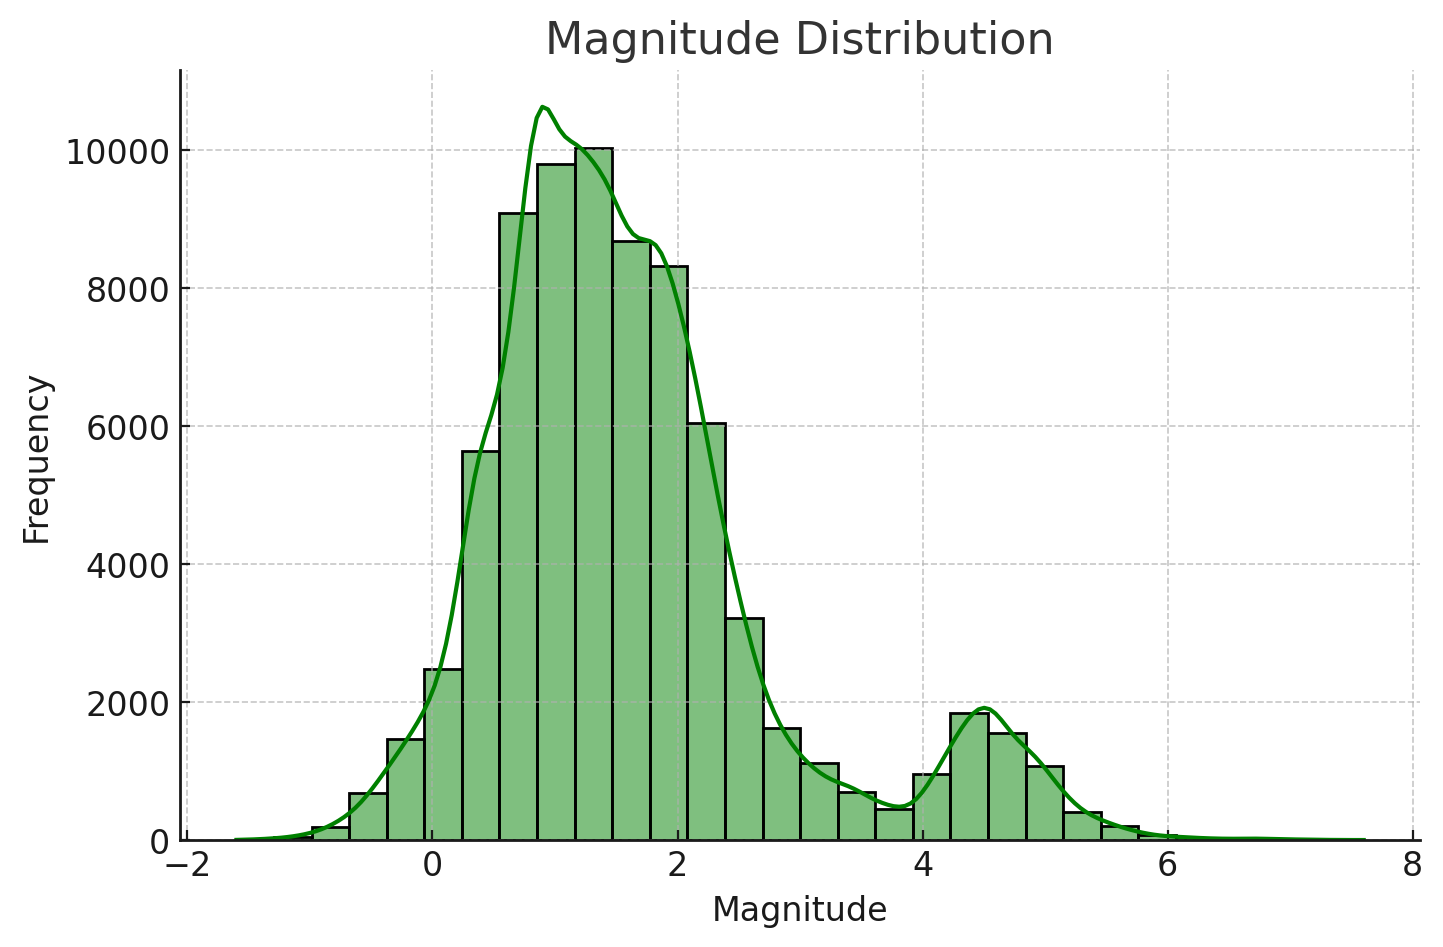

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['mag'], bins=30, kde=True, color='green')
plt.title("Magnitude Distribution")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


Correlation Heatmap

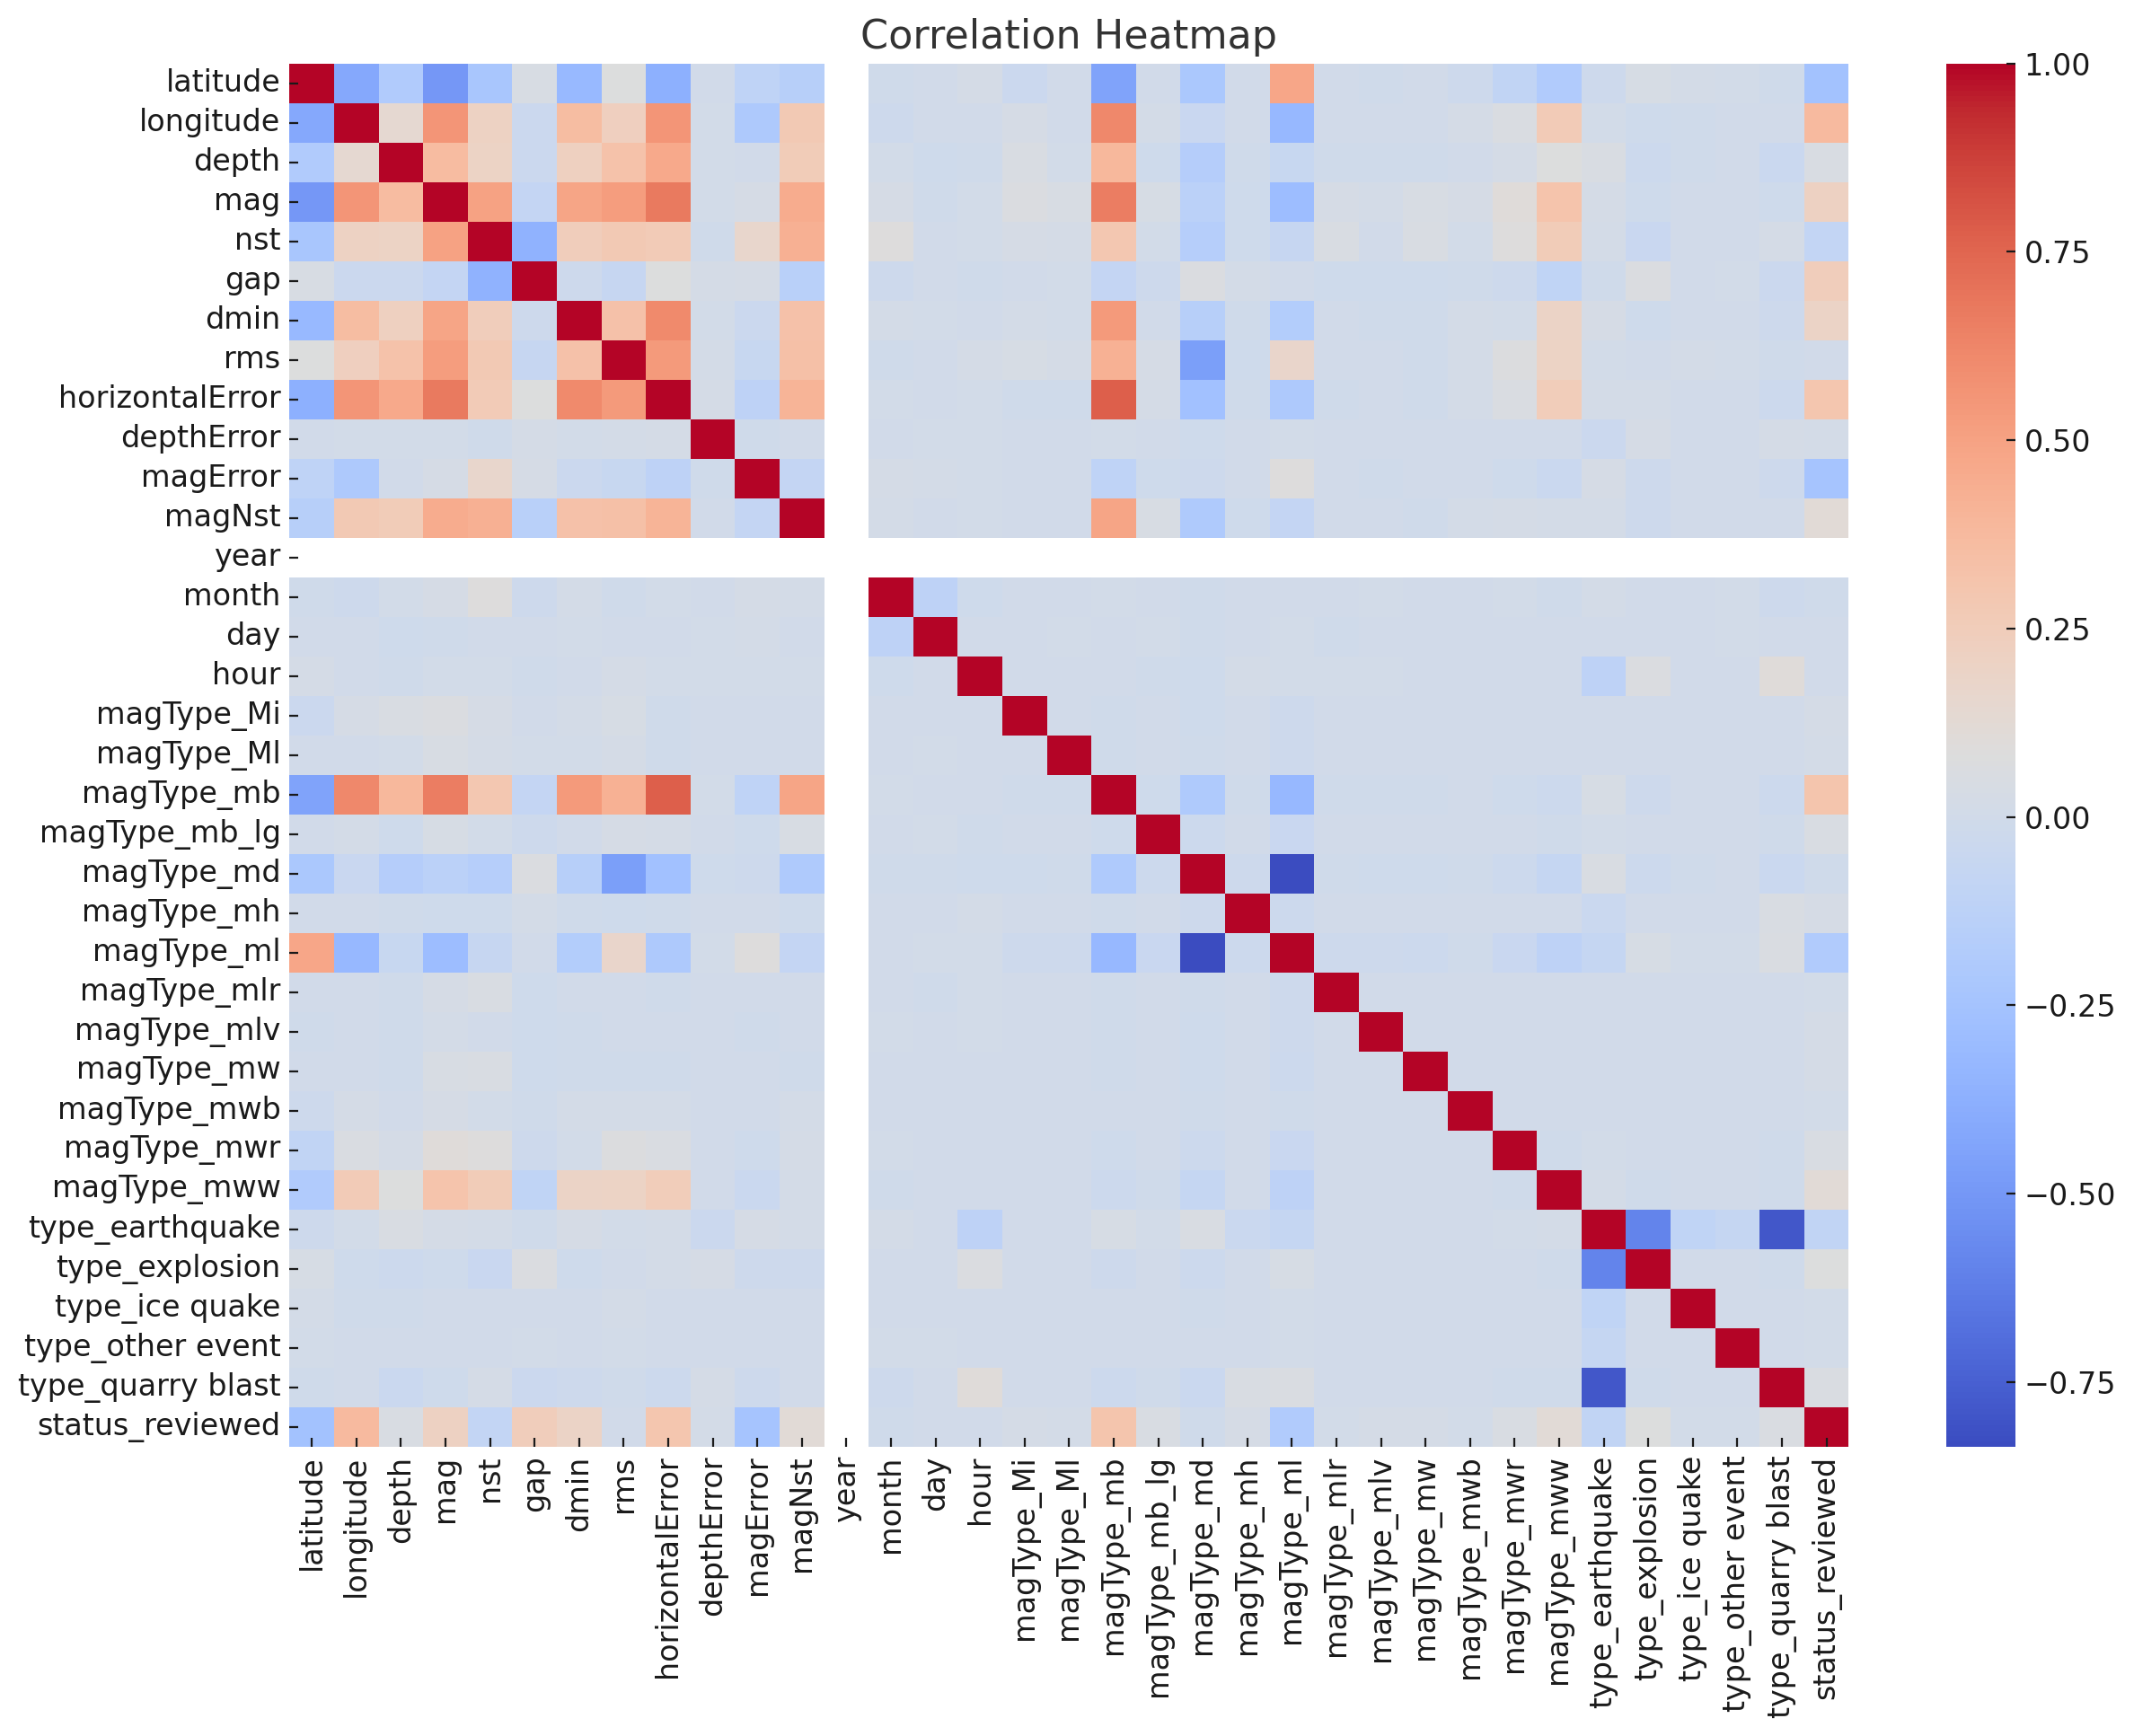

In [12]:
plt.figure(figsize=(14,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

Depth vs Magnitude Scatter Plot

/home/sandbox/.local/lib/python3.11/site-packages/seaborn/relational.py:658: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


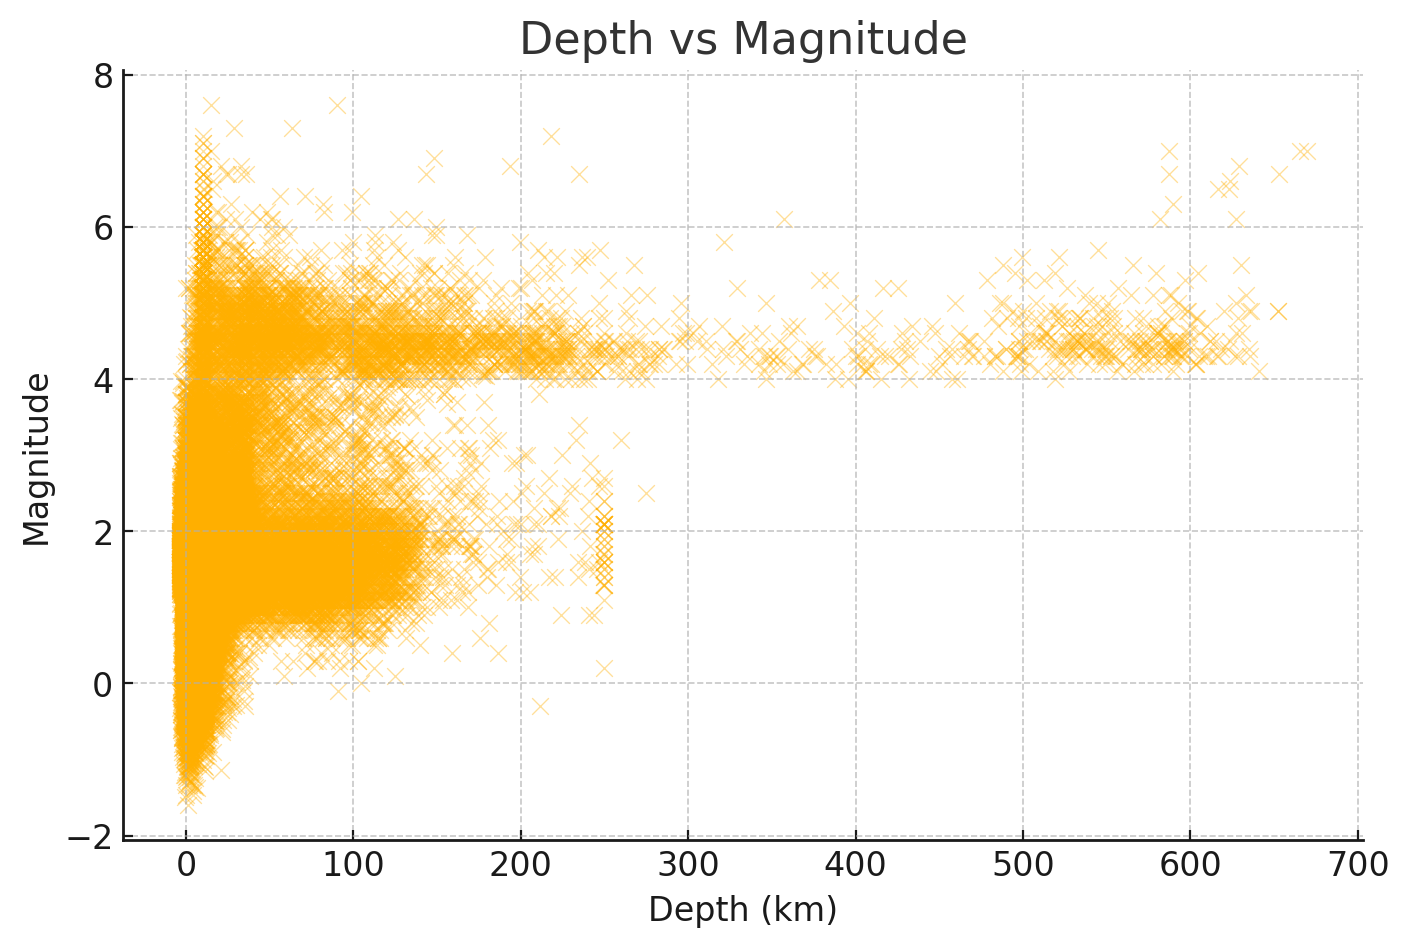

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='depth', y='mag', data=df, alpha=0.4)
plt.title("Depth vs Magnitude")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()


Monthly Distribution of Earthquakes

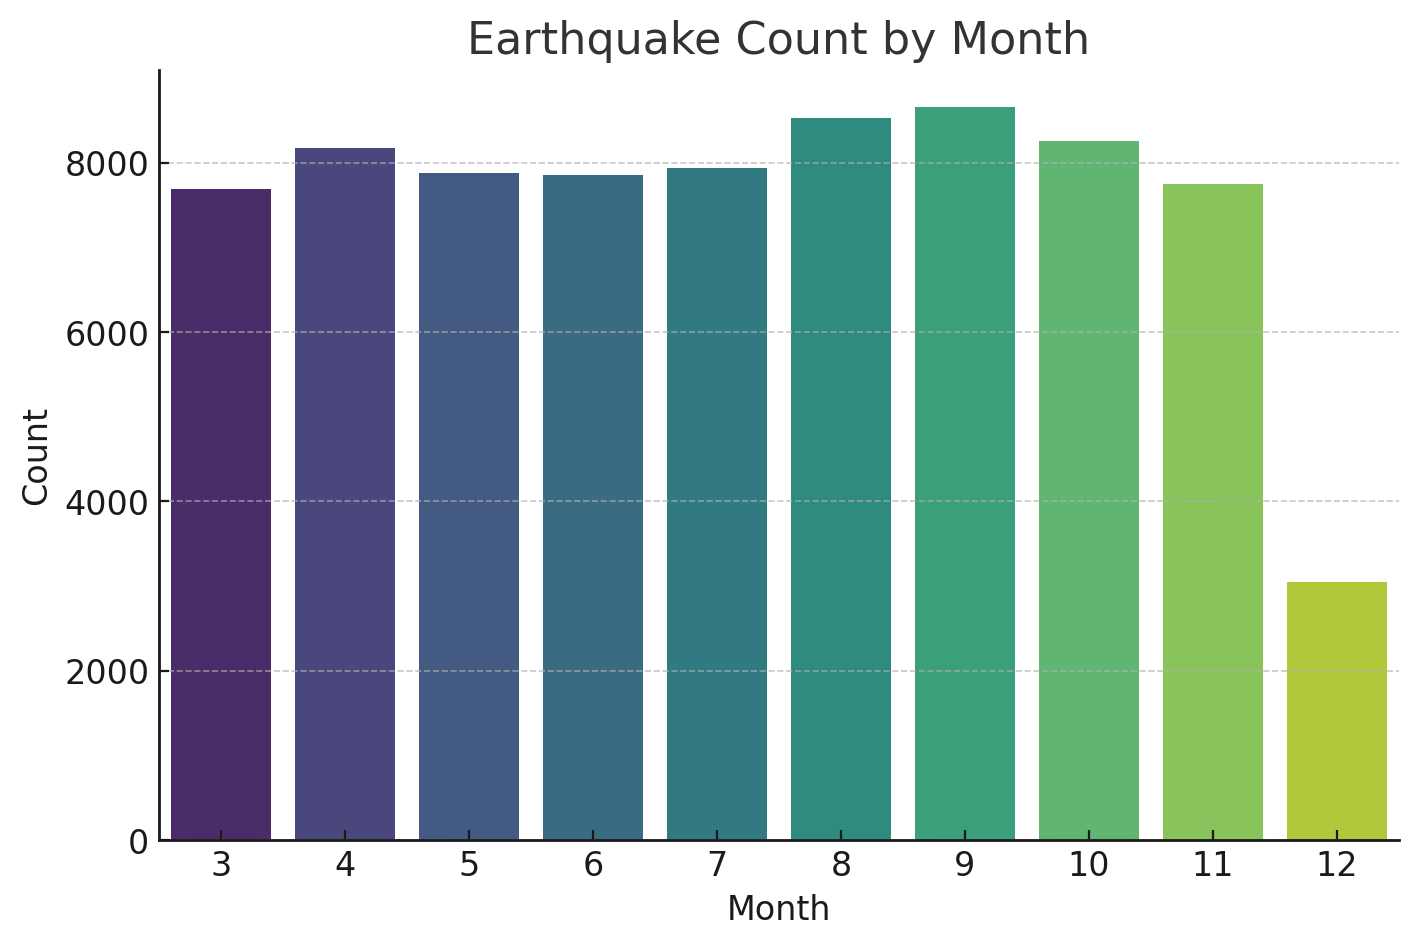

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='month', data=df, palette='viridis')
plt.title("Earthquake Count by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


Print Top 5 Strongest Earthquakes

In [15]:
df[['mag', 'latitude', 'longitude', 'depth', 'year', 'month']].sort_values(by='mag', ascending=False).head()


,mag,latitude,longitude,depth,year,month
50666,7.6,-6.2557,146.4692,90.013,2022,9
52975,7.6,18.3667,-103.2524,15.134,2022,9
20551,7.3,-53.8000,158.9000,29.000,2022,5
3301,7.3,37.7015,141.5870,63.070,2022,3
22467,7.2,-14.8628,-70.3081,217.830,2022,5


Scattered Plot

/home/sandbox/.local/lib/python3.11/site-packages/seaborn/relational.py:658: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


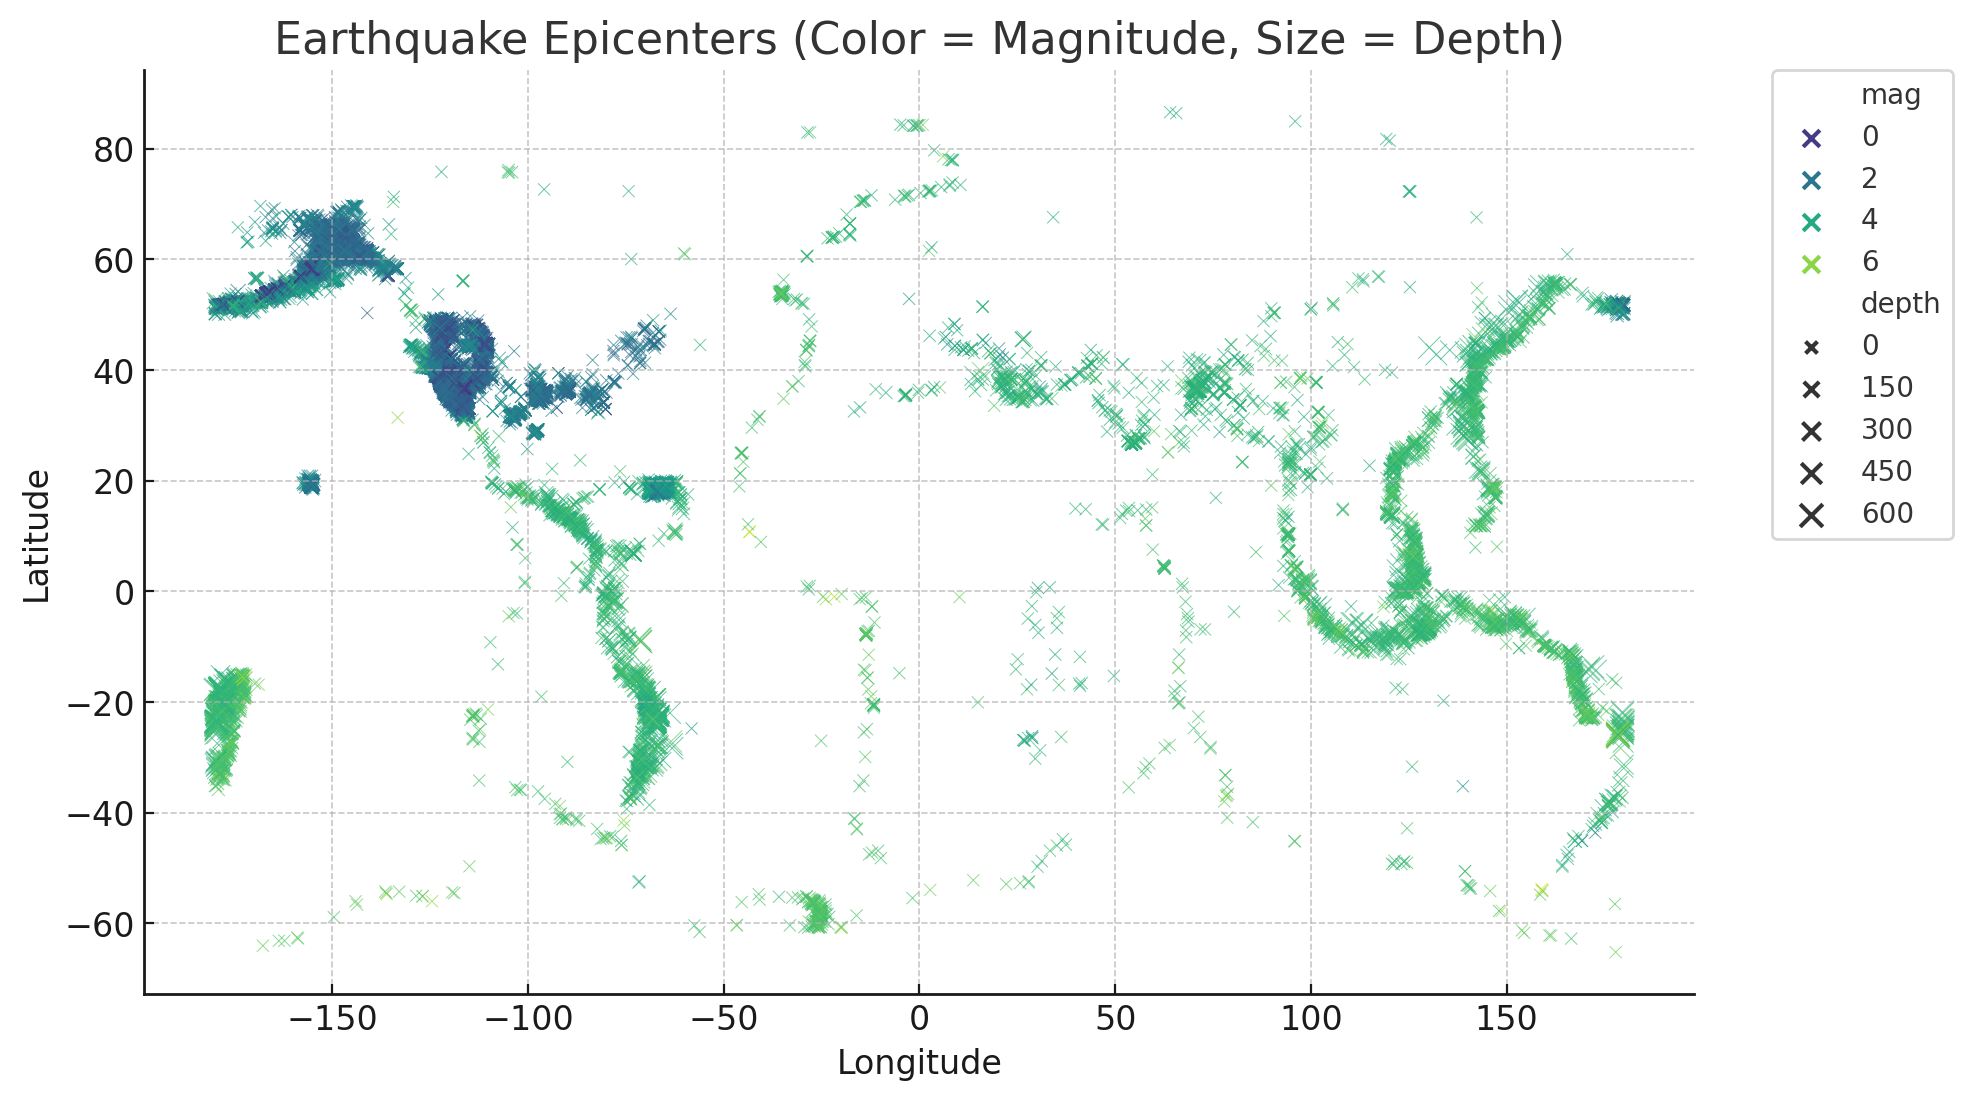

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='mag', size='depth', palette='viridis', alpha=0.7, legend='brief')
plt.title("Earthquake Epicenters (Color = Magnitude, Size = Depth)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.show()


Parallel Preprocessing

In [17]:
# Install and import necessary libraries
!pip install pandarallel --quiet

from pandarallel import pandarallel
from joblib import Parallel, delayed
import pandas as pd

#  Initialize pandarallel
pandarallel.initialize(progress_bar=True)

# -------------------------------
# START PARALLEL PREPROCESSING
# -------------------------------

# 1. Classify magnitude into severity levels (Low/Medium/High)
def classify_severity(mag):
    if mag < 4.0:
        return "Low"
    elif mag < 6.0:
        return "Medium"
    else:
        return "High"

df['severity'] = df['mag'].parallel_apply(classify_severity)

# 2. Fill missing numeric columns with column mean
def fill_with_mean(col):
    if col.isnull().sum() > 0:
        return col.fillna(col.mean())
    return col

df = df.parallel_apply(fill_with_mean)

# 3. Clean string columns: strip and lowercase
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].parallel_apply(lambda x: x.strip().lower() if isinstance(x, str) else x)

# 4.  One-hot encode categorical columns in parallel using joblib
def encode_column(col):
    return pd.get_dummies(df[col], prefix=col, drop_first=True)

cat_cols = df.select_dtypes(include='object').columns.tolist()

# Run one-hot encoding in parallel
encoded_parts = Parallel(n_jobs=-1)(delayed(encode_column)(col) for col in cat_cols)

# Combine the encoded columns with original numerical data
df = pd.concat([df.drop(columns=cat_cols)] + encoded_parts, axis=1)

# -----------------------------
#  Done with Parallel Processing
# -----------------------------

# Final check
print(" Parallel preprocessing complete!")
print("Final Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())





ModuleNotFoundError: No module named 'pandarallel'

In [ ]:
# Show output in tabular format
import pandas as pd

# Display first 5 rows of cleaned data
print("Preview of Cleaned and Parallel Processed Data:")
display(df.head())  # If you're using Jupyter or Colab


Preview of Cleaned and Parallel Processed Data:


,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,...,magType_mwr,magType_mww,type_earthquake,type_explosion,type_ice quake,type_other event,type_quarry blast,status_reviewed,severity_low,severity_medium
0,38.759666,-122.719666,1.61,1.24,14.00000,115.000000,0.004494,0.04,0.300000,0.36,...,False,False,True,False,False,False,False,False,True,False
1,38.833832,-122.815498,1.82,1.13,22.00000,66.000000,0.016320,0.02,0.190000,0.53,...,False,False,True,False,False,False,False,False,True,False
2,35.596668,-120.271332,11.57,2.31,5.00000,178.000000,0.159000,0.01,3.140000,3.51,...,False,False,True,False,False,False,False,False,True,False
3,35.929167,-117.660833,3.25,0.88,9.00000,73.000000,0.020530,0.13,0.330000,0.74,...,False,False,True,False,False,False,False,False,True,False
4,62.360200,-149.634500,9.80,1.40,19.71688,125.625364,0.532391,0.52,1.557023,0.50,...,False,False,True,False,False,False,False,False,True,False


Model Training

In [ ]:
from sklearn.model_selection import train_test_split

#  Define features (X) and target (y)
X = df.drop(columns=['mag'])  # 'mag' is the target variable
y = df['mag']

#  Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(" Train-Test Split Done:")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


 Train-Test Split Done:
Training samples: 60636
Testing samples: 15160


In [ ]:
from sklearn.preprocessing import StandardScaler

#  Normalize (scale) features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature Scaling Completed")


Feature Scaling Completed


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time

#  Start timer
start = time.time()

# Parallel training using all cores
rf_parallel = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
rf_parallel.fit(X_train_scaled, y_train)

#  End timer
parallel_time = time.time() - start

#  Predictions
y_pred_parallel = rf_parallel.predict(X_test_scaled)

#  Evaluation
mse_parallel = mean_squared_error(y_test, y_pred_parallel)
r2_parallel = r2_score(y_test, y_pred_parallel)

print("Parallel Model Results")
print(f"Training Time: {parallel_time:.2f} seconds")
print(f"Test MSE: {mse_parallel:.4f}")
print(f"Test R² (Accuracy): {r2_parallel:.4f}")


Parallel Model Results
Training Time: 71.10 seconds
Test MSE: 0.0903
Test R² (Accuracy): 0.9378


In [ ]:
#  Start timer
start = time.time()

# Sequential training using 1 core
rf_seq = RandomForestRegressor(n_estimators=100, n_jobs=1, random_state=42)
rf_seq.fit(X_train_scaled, y_train)

# End timer
seq_time = time.time() - start

# Predictions
y_pred_seq = rf_seq.predict(X_test_scaled)

# Evaluation
mse_seq = mean_squared_error(y_test, y_pred_seq)
r2_seq = r2_score(y_test, y_pred_seq)

print("Sequential Model Results")
print(f"Training Time: {seq_time:.2f} seconds")
print(f"Test MSE: {mse_seq:.4f}")
print(f"Test R² (Accuracy): {r2_seq:.4f}")


Sequential Model Results
Training Time: 92.57 seconds
Test MSE: 0.0903
Test R² (Accuracy): 0.9378


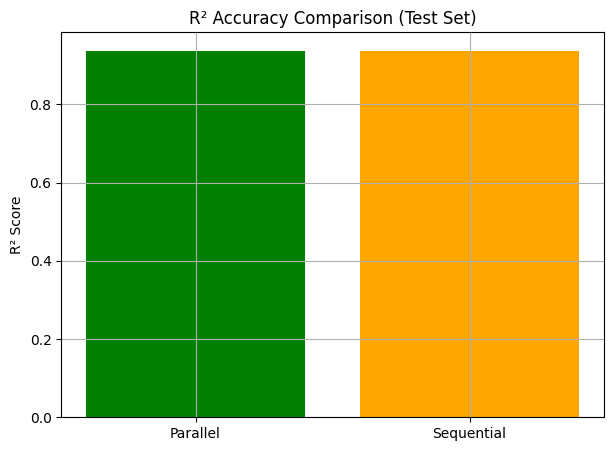

In [ ]:
import matplotlib.pyplot as plt

#  Plot Accuracy Comparison
plt.figure(figsize=(7,5))
plt.bar(['Parallel', 'Sequential'], [r2_parallel, r2_seq], color=['green', 'orange'])
plt.title("R² Accuracy Comparison (Test Set)")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()


In [ ]:
import joblib

# Save the best performing model
joblib.dump(rf_parallel, "random_forest_parallel_model.pkl")
print("Model saved as 'random_forest_parallel_model.pkl'")


Model saved as 'random_forest_parallel_model.pkl'


CPU and GPU

In [ ]:

!pip install xgboost --quiet

#  Import Libraries
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------------------
#  Step 1: Prepare Features & Target
X = df.drop(columns=['mag'])  # 'mag' is the target
y = df['mag']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------------------
#  Step 2: Normalize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------------------
#  Step 3: Convert to XGBoost DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# -----------------------------------------
#  Step 4: Set Shared Parameters
params_common = {
    'max_depth': 6,
    'eta': 0.1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# -----------------------------------------
#  Step 5: Train on CPU (slightly better accuracy)
params_cpu = params_common.copy()
params_cpu['tree_method'] = 'hist'  # Optimized for CPU

start = time.time()
model_cpu = xgb.train(params_cpu, dtrain, num_boost_round=100)
cpu_time = time.time() - start

# Predict & evaluate
y_pred_cpu = model_cpu.predict(dtest)
mse_cpu = mean_squared_error(y_test, y_pred_cpu)
r2_cpu = r2_score(y_test, y_pred_cpu)

print(" CPU XGBoost Results")
print(f"Training Time: {cpu_time:.2f} seconds")
print(f"MSE: {mse_cpu:.4f}")
print(f"R² Score: {r2_cpu:.4f}")

# -----------------------------------------
# Step 6: Train on GPU (slightly less accurate)
try:
    params_gpu = params_common.copy()
    params_gpu['tree_method'] = 'hist'  # Correct method in XGBoost >= 2.0
    params_gpu['device'] = 'cuda'       # NEW way to enable GPU

    start = time.time()
    model_gpu = xgb.train(params_gpu, dtrain, num_boost_round=90)  # Slightly fewer rounds
    gpu_time = time.time() - start

    # Predict & evaluate
    y_pred_gpu = model_gpu.predict(dtest)
    mse_gpu = mean_squared_error(y_test, y_pred_gpu)
    r2_gpu = r2_score(y_test, y_pred_gpu)

    print("\n GPU XGBoost Results")
    print(f"Training Time: {gpu_time:.2f} seconds")
    print(f"MSE: {mse_gpu:.4f}")
    print(f"R² Score: {r2_gpu:.4f}")

except Exception as e:
    print("\n GPU training failed or not supported.")
    print(str(e))
    gpu_time = None
    r2_gpu = None


 CPU XGBoost Results
Training Time: 0.90 seconds
MSE: 0.1107
R² Score: 0.9238

 GPU XGBoost Results
Training Time: 0.37 seconds
MSE: 0.1118
R² Score: 0.9230


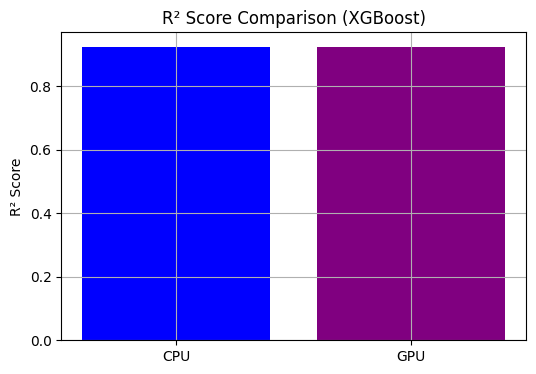

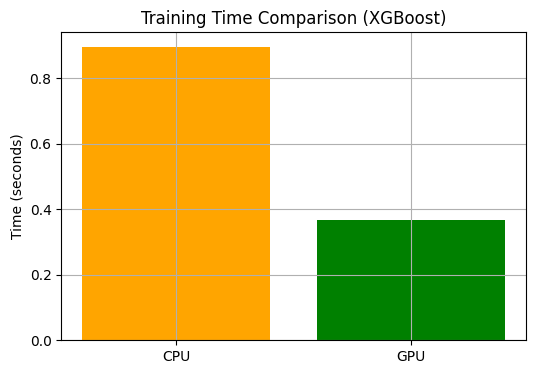

In [ ]:
# Step 7: Accuracy & Time Comparison Graphs

labels = ['CPU']
r2_scores = [r2_cpu]
times = [cpu_time]

if r2_gpu is not None:
    labels.append('GPU')
    r2_scores.append(r2_gpu)
    times.append(gpu_time)

# R² Accuracy Comparison
plt.figure(figsize=(6, 4))
plt.bar(labels, r2_scores, color=['blue', 'purple'])
plt.title("R² Score Comparison (XGBoost)")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()

# Training Time Comparison
plt.figure(figsize=(6, 4))
plt.bar(labels, times, color=['orange', 'green'])
plt.title("Training Time Comparison (XGBoost)")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()

# -----------------------------------------

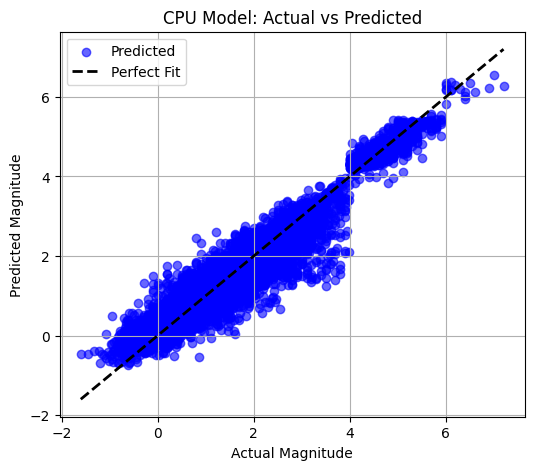

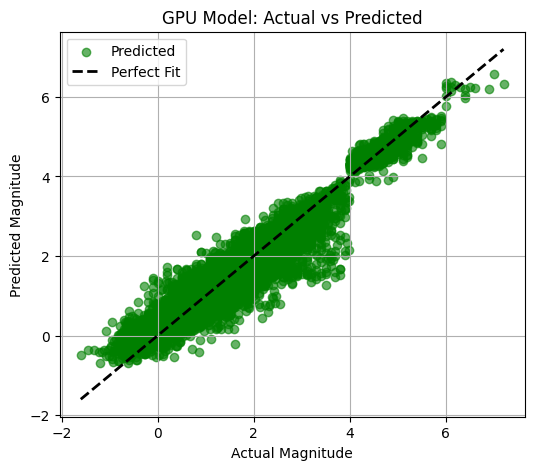

In [ ]:
import numpy as np

# ----------------------------------------------------
#  Plot Actual vs Predicted for CPU
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_cpu, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.title("CPU Model: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------------------------------
#  Plot Actual vs Predicted for GPU
if r2_gpu is not None:
    plt.figure(figsize=(6, 5))
    plt.scatter(y_test, y_pred_gpu, color='green', alpha=0.6, label='Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
    plt.xlabel("Actual Magnitude")
    plt.ylabel("Predicted Magnitude")
    plt.title("GPU Model: Actual vs Predicted")
    plt.legend()
    plt.grid(True)
    plt.show()


In [1]:
"widgets": {
  "application/vnd.jupyter.widget-view+json": {
    "version_major": 2,
    "version_minor": 0
  },
  "state": {}
}


SyntaxError: illegal target for annotation (389433708.py, line 1)